In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import roc_auc_score ,confusion_matrix ,accuracy_score
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt 
from sklearn.linear_model import Ridge, Lasso
import warnings
warnings.filterwarnings("ignore")

### the first part is data analysis were we load the data and clean  it by encoding the catagorical varaiables and applying standariezaion

In [3]:
df = pd.read_csv(r'C:\Users\HP\Downloads\fraud.csv')

In [4]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


In [6]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
df['isFraud'].value_counts()


0    1047433
1       1142
Name: isFraud, dtype: int64

In [9]:
df['type'].unique() , len(df['type'].unique())

(array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
       dtype=object),
 5)

In [10]:
df['nameDest'].unique() , len(df['nameDest'].unique())

(array(['M1979787155', 'M2044282225', 'C553264065', ..., 'M1355182933',
        'M1964992463', 'M677577406'], dtype=object),
 449635)

In [11]:
df['nameOrig'].unique() , len(df['nameOrig'].unique())

(array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C2037964975',
        'C1633237354', 'C1264356443'], dtype=object),
 1048317)

In [12]:
lb_make = LabelEncoder()
df['type_code'] = lb_make.fit_transform(df['type'])
df['nameDest_code'] = lb_make.fit_transform(df['nameDest'])
df['nameOrig_code'] = lb_make.fit_transform(df['nameOrig'])


In [13]:
df = df.drop(['type', 'nameDest', "nameOrig"],axis=1)

### from the below line we see that each column has diffrent range of values so minMaxScaler is used to change all the columns range between [0,1]

In [14]:
for i in (df):
      print(f' column {i} range = ',(np.max(df[i].values) - np.min(df[i].values)))

 column step range =  94
 column amount range =  9999999.9
 column oldbalanceOrg range =  38900000.0
 column newbalanceOrig range =  38900000.0
 column oldbalanceDest range =  42100000.0
 column newbalanceDest range =  42200000.0
 column isFraud range =  1
 column isFlaggedFraud range =  0
 column type_code range =  4
 column nameDest_code range =  449634
 column nameOrig_code range =  1048316


In [15]:
cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'type_code','nameDest_code', 'nameOrig_code']

In [16]:
d_y =df['isFraud']

In [17]:
std_scaler = MinMaxScaler()
Stand_Sc = std_scaler.fit_transform(df[cols])

In [18]:
d_x =pd.DataFrame(Stand_Sc,columns=cols)

In [19]:
for i in (d_x):
  print(f' column {i} range =',( np.max(d_x[i].values) - np.min(d_x[i].values)))

 column step range = 1.0
 column amount range = 1.0
 column oldbalanceOrg range = 1.0
 column newbalanceOrig range = 1.0
 column oldbalanceDest range = 1.0
 column newbalanceDest range = 1.0
 column type_code range = 1.0
 column nameDest_code range = 1.0
 column nameOrig_code range = 0.9999999999999999


In [20]:
x_train , x_testVal ,y_train , y_testVal =train_test_split(d_x,d_y,test_size=0.4)

In [21]:
x_test , x_val ,y_test , y_val =train_test_split(x_testVal,y_testVal,test_size=0.5)

In [22]:
x_train.shape, x_test.shape, x_val.shape

((629145, 9), (209715, 9), (209715, 9))

### applying logistic regression without penalty 

In [106]:
lr = LogisticRegression(penalty = "none")
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)

pred_lr_val = lr.predict(x_val)
confusion_matrix(y_test, pred_lr)

array([[209440,     16],
       [   150,    109]], dtype=int64)

## classification_report for the cross validation set

In [107]:
print(classification_report(y_test,pred_lr))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209456
           1       0.87      0.42      0.57       259

    accuracy                           1.00    209715
   macro avg       0.94      0.71      0.78    209715
weighted avg       1.00      1.00      1.00    209715



## classification_report for the test set

In [108]:
print(classification_report(y_val,pred_lr_val))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209505
           1       0.92      0.44      0.59       210

    accuracy                           1.00    209715
   macro avg       0.96      0.72      0.80    209715
weighted avg       1.00      1.00      1.00    209715



## applying lasso regression 

### from the confusion matrix we can see that after applying the default regulaization we get better prediction as the first last which is zero has been correctly predicted but still need some imporvment for the second class

In [126]:
lr_ridge = LogisticRegression(penalty = 'l2')
lr_ridge.fit(x_train,y_train)
pred_lr_ridge = lr_ridge.predict(x_test)
confusion_matrix(y_test, pred_lr_ridge)

array([[209456,      0],
       [   245,     14]], dtype=int64)

### we get the same results as logistic regression without regularization

In [129]:
print(classification_report(y_test,pred_lr_ridge))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209456
           1       1.00      0.05      0.10       259

    accuracy                           1.00    209715
   macro avg       1.00      0.53      0.55    209715
weighted avg       1.00      1.00      1.00    209715



## applying ridge regression

### as for using ridge regression we get better prediction than without regularization but lasso gives better accuracy than ridge  regression 

In [127]:
lr_lasso = LogisticRegression(penalty = 'l1', solver = 'liblinear')
lr_lasso.fit(x_train,y_train)
pred_lr_lasso = lr_lasso.predict(x_test)
confusion_matrix(y_test, pred_lr_lasso)

array([[209453,      3],
       [   191,     68]], dtype=int64)

In [128]:
print(classification_report(y_test,pred_lr_lasso))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209456
           1       0.96      0.26      0.41       259

    accuracy                           1.00    209715
   macro avg       0.98      0.63      0.71    209715
weighted avg       1.00      1.00      1.00    209715



### kfold

In [113]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model,d_x,d_y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.999 (0.000)


### StratifiedKFold

In [114]:
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model,d_x,d_y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.999 (0.000)


## lasso regression
##### looping over a wide range of alphas to get the best alpha for this dataset by selecting the alpha with the least error

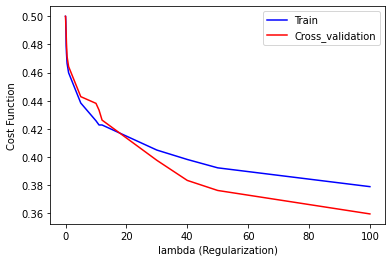

In [115]:
predict_val_1=[]
predict_train_1=[]
min=[]
C_param_range = [0.001,0.01,0.1,0.2,0.3,0.4,0.5,1,5,10,11,12,30,40,50,100]
for i in C_param_range:
    lr_clf=LogisticRegression(C=i)
    lr_clf.fit(x_train,y_train)
    pred_val=lr_clf.predict(x_val)
    accuracy_val=roc_auc_score(y_val,pred_val)
    err_val=1-accuracy_val
    predict_val_1.append(1-accuracy_val)
    
    pred_train=lr_clf.predict(x_train)
    accuracy_train=roc_auc_score(y_train,pred_train)
    predict_train_1.append(1-accuracy_train)


    
fig, ax = plt.subplots()
ax.plot(C_param_range, predict_train_1, '-b', label='Train')
ax.plot(C_param_range, predict_val_1, '-r', label='Cross_validation')
plt.xlabel("lambda (Regularization)")
plt.ylabel("Cost Function")
leg = ax.legend();

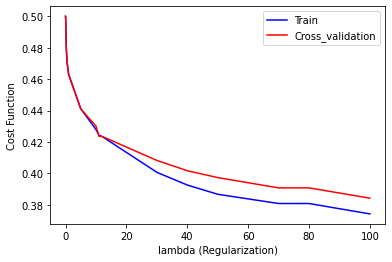

In [24]:
predict_val_1=[]
predict_train_1=[]
min=[]
C_param_range = [0.001,0.01,0.1,0.2,0.3,0.4,0.5,1,5,10,11,12,30,40,50,70,80,100]
for i in C_param_range:
    lr_clf=LogisticRegression(C=i)
    lr_clf.fit(x_train,y_train)
    pred_val=lr_clf.predict(x_val)
    accuracy_val=roc_auc_score(y_val,pred_val)
    err_val=1-accuracy_val
    predict_val_1.append(1-accuracy_val)
    
    pred_train=lr_clf.predict(x_train)
    accuracy_train=roc_auc_score(y_train,pred_train)
    predict_train_1.append(1-accuracy_train)


    
fig, ax = plt.subplots()
ax.plot(C_param_range, predict_train_1, '-b', label='Train')
ax.plot(C_param_range, predict_val_1, '-r', label='Cross_validation')
plt.xlabel("lambda (Regularization)")
plt.ylabel("Cost Function")
leg = ax.legend();

In [116]:
best_alpha_1 = np.argmin(np.min(predict_val_1))
print('degree with minimum error is: ', C_param_range[best_alpha_1])
print('error value: ',np.min(predict_val_1))

degree with minimum error is:  0.001
error value:  0.35952858267958154


### after chosing the alpha with the least error by testing on the cross validation we get alpha 0.001 and we can see that all the classes were correctly predicted as shown in the confusion matrix

In [125]:
lr_lasso = LogisticRegression(penalty = 'l2', C= C_param_range[best_alpha_1])
lr_lasso.fit(x_train,y_train)
pred_lr_lasso = lr_lasso.predict(x_test)
confusion_matrix(y_test, pred_lr_lasso)

array([[209456,      0],
       [   259,      0]], dtype=int64)

### ridge regression
##### looping over a wide range of alphas to get the best alpha for this dataset by selecting the alpha with the least error

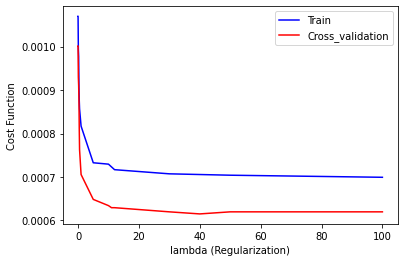

In [118]:
predict_val=[]
predict_train=[]
min=[]
C_param_range = [0.001,0.01,0.1,0.2,0.3,0.4,0.5,1,5,10,11,12,30,40,50,100]
for i in C_param_range:
    lr_clf=LogisticRegression(penalty = 'l1', solver = 'liblinear', C=i)
    lr_clf.fit(x_train,y_train)
    pred_val=lr_clf.predict(x_val)
    accuracy_val=accuracy_score(y_val,pred_val)
    err_val=1-accuracy_val
    predict_val.append(1-accuracy_val)
    pred_train=lr_clf.predict(x_train)
    accuracy_train=accuracy_score(y_train,pred_train)
    predict_train.append(1-accuracy_train)
    
fig, ax = plt.subplots()
ax.plot(C_param_range, predict_train, '-b', label='Train')
ax.plot(C_param_range, predict_val, '-r', label='Cross_validation')
plt.xlabel("lambda (Regularization)")
plt.ylabel("Cost Function")
leg = ax.legend();

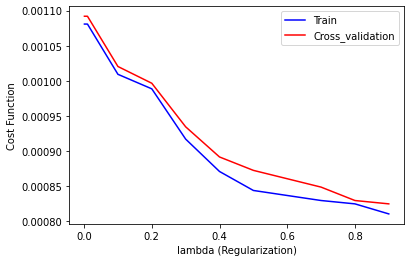

In [23]:
predict_val=[]
predict_train=[]
min=[]
C_param_range = [0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.7,0.8,0.9]
for i in C_param_range:
    lr_clf=LogisticRegression(penalty = 'l1', solver = 'liblinear', C=i)
    lr_clf.fit(x_train,y_train)
    pred_val=lr_clf.predict(x_val)
    accuracy_val=accuracy_score(y_val,pred_val)
    err_val=1-accuracy_val
    predict_val.append(1-accuracy_val)
    pred_train=lr_clf.predict(x_train)
    accuracy_train=accuracy_score(y_train,pred_train)
    predict_train.append(1-accuracy_train)
    
fig, ax = plt.subplots()
ax.plot(C_param_range, predict_train, '-b', label='Train')
ax.plot(C_param_range, predict_val, '-r', label='Cross_validation')
plt.xlabel("lambda (Regularization)")
plt.ylabel("Cost Function")
leg = ax.legend();

###  now ridge also gives better results same as lasso regression

In [119]:
best_alpha = np.argmin(np.min(predict_val))
print('degree with minimum error is: ', C_param_range[best_alpha])
print('error value: ',np.min(predict_val))

degree with minimum error is:  0.001
error value:  0.000615120520706669


In [124]:
lr_ridge = LogisticRegression(penalty = 'l1', solver = 'liblinear', C= C_param_range[best_alpha])
lr_ridge.fit(x_train,y_train)
pred_lr_ridge = lr_ridge.predict(x_test)
confusion_matrix(y_test, pred_lr_ridge)

array([[209456,      0],
       [   259,      0]], dtype=int64)